# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames
import seaborn as sns
import matplotlib.pyplot as plt

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print("Wholesale customers dataset has {} samples with {} features each.".format(*data.shape))
except:
    print("Dataset could not be loaded. Is the dataset missing?")

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [2]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [3]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [38, 260, 401]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print("Chosen samples of wholesale customers dataset:")
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,4591,15729,16709,33,6956,433
1,9193,4885,2157,327,780,548
2,27167,2801,2128,13223,92,1902


### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  

* What kind of establishment (customer) could each of the three samples you've chosen represent?

**Hint:** Examples of establishments include places like markets, cafes, delis, wholesale retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant. You can use the mean values for reference to compare your samples with. The mean values are as follows:

* Fresh: 12000.2977
* Milk: 5796.2
* Grocery: 7951.3
* Detergents_paper: 2881.4
* Delicatessen: 1524.8

Knowing this, how do your samples compare? Does that help in driving your insight into what kind of establishments they might be? 


### Question 1 - Answer

**Sample 1**

Establishment with **index 0** shows spending amounts above the mean for the features `Fresh`, `Milk`, `Grocery` and `Detergents_paper`. The spending amount for the feature `Grocery` is even in the top quarter of values when looking at the dataset above. Spending for the features `Frozen` and `Fresh` are below the feature mean. Spending for the feature `Delicatessen` is below the feature mean. This establishment could be a supermaket/large grocery store with a small shop area for frozen and fresh products.<br>

**Sample 2**

Establishment with **index 1** shows spending amounts below the mean for all six features. This establishment could also be a small grocery store; but one that is considerably smaller than the potential one from **index 0**.<br>

**Sample 3**

Establishment with **index 2** shows spending amounts above the mean for the features `Fresh`, `Frozen` and `Delicatessen`. This establishment could be a restaurant that needs a high number of frozen products for enlarging the selection of menu items. Also fresh products are important for the quality of food in a restaurant.

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [4]:
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor

# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
new_data = data.drop(['Grocery'], axis=1)

# TODO: Split the data into training and testing sets(0.25) using the given feature as the target
# Set a random state.
X_train, X_test, y_train, y_test = train_test_split(new_data, data[['Grocery']], test_size=0.25, random_state=14)

# TODO: Create a decision tree regressor and fit it to the training set
regressor = DecisionTreeRegressor(random_state=14)
regressor.fit(X_train, y_train)

# TODO: Report the score of the prediction using the testing set
score = regressor.score(X_test, y_test)
print(np.round(score,4))

# Grocery          -> 0.7749
# Detergents_Paper -> 0.6688
# Milk             -> 0.3971
# Frozen           -> -0.1164
# Fresh            -> -0.0971
# Delicatessen     -> -0.0033


0.7749


/anaconda3/lib/python3.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Question 2

* Which feature did you attempt to predict? 
* What was the reported prediction score? 
* Is this feature necessary for identifying customers' spending habits?

**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data. If you get a low score for a particular feature, that lends us to beleive that that feature point is hard to predict using the other features, thereby making it an important feature to consider when considering relevance.

### Question 2 - Answer

I computed the coefficient of determination, `R^2`, for the feature `Grocery`. The value of R^2 is 0.7749, meaning that the feature `Grocery` can be predicted relatively well by the decision tree regressor and the other (not dropped) features.<br>

Furthermore, the value of R^2 for the feature `Grocery` implies, that this feature is not an independet variable and therefore does not contribute to any additonal information on how customers spend their money.<br>

The same observation holds true for the the features `Detergents_Paper` and `Milk` (to different degrees).

For completeness, I have included above the value of R^2 for each feature.

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  


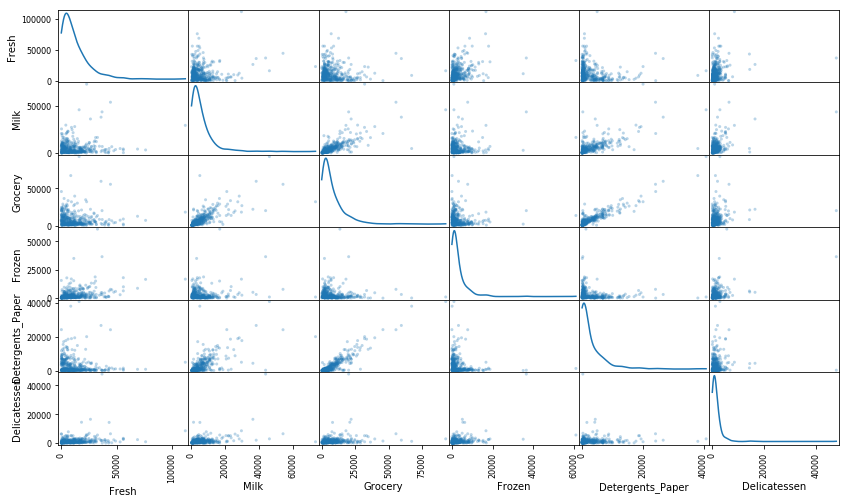

In [5]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Question 3
* Using the scatter matrix as a reference, discuss the distribution of the dataset, specifically talk about the normality, outliers, large number of data points near 0 among others. If you need to sepearate out some of the plots individually to further accentuate your point, you may do so as well.
* Are there any pairs of features which exhibit some degree of correlation? 
* Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? 
* How is the data for those features distributed?

**Hint:** Is the data normally distributed? Where do most of the data points lie? You can use [corr()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html) to get the feature correlations and then visualize them using a [heatmap](http://seaborn.pydata.org/generated/seaborn.heatmap.html)(the data that would be fed into the heatmap would be the correlation values, for eg: `data.corr()`) to gain further insight.

### Question 3 - Answer

#### Degrees of correlation between features

The heatmap below confirms my suspicion on correlation between the following features:

Milk - Grocery (0.73)<br>
Detergents_Paper - Grocery (0.92)<br>
Detergents_Paper - Milk (0.66)<br>

These results are in line with the scatter matrix above that shows the correlation between the bespoke feature pairs.

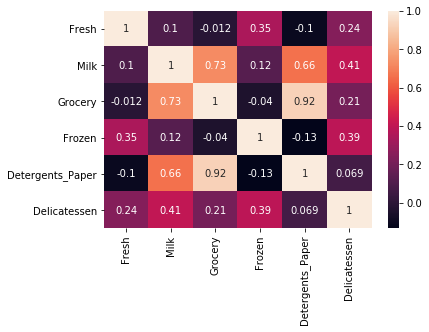

In [6]:
sns.heatmap(data.corr(), annot=True)

#### Idenification of outliers, distribution and normality

In our customer segment project, an outlier for a e.g. feature `Milk` represents a data value that is distant from the majority of data values for this feature. Outliers can be due to errors in measurement or high variability in a data set ([Reference](https://en.wikipedia.org/wiki/Outlier)). For our project we assume that the later is the case. Outliers can have an impact on the efficency of machine learning algorithms. For this reason we will identify outliers with the interquartile range **(IQR)**. This measure of distribution is robust to outliers.<br>

As can be seen from the boxplots below, there are a number of outliers for each feature. In addition, the range of values varies considerably between the six features of our dataset.

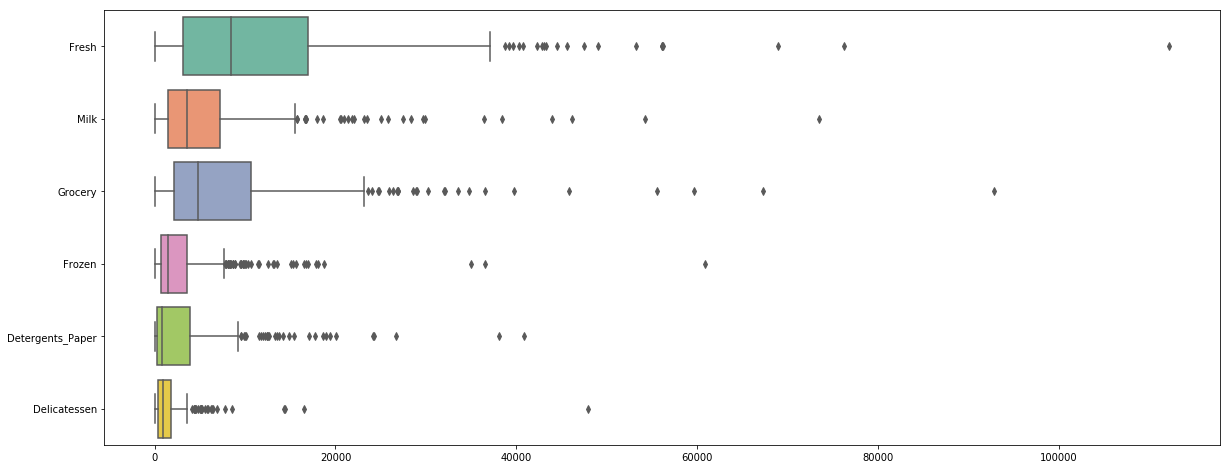

In [7]:
plt.figure(figsize = (20,8))
sns.boxplot(data=data, orient='h', palette="Set2")

The following graph shows for all of the features the large number of values close to 0. Moreover, all features are (to various degrees) skewed to the right.<br>

Given these insights we can conclude, that the data is not normally distributed for any of the six features.

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


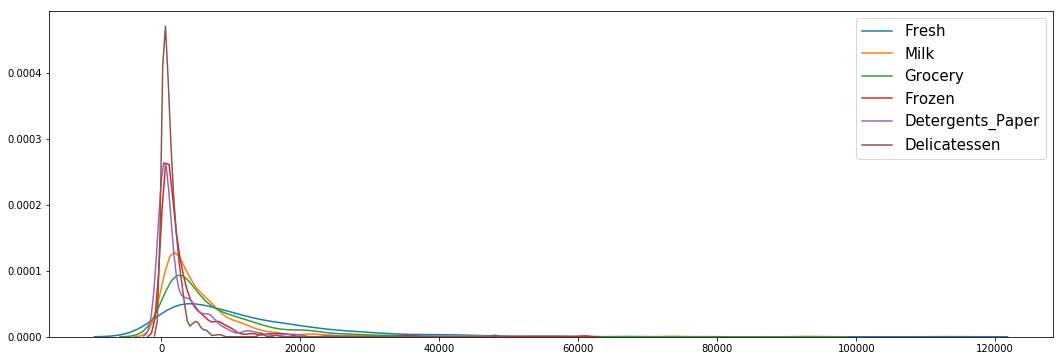

In [8]:
plt.figure(figsize = (18,6))

for cols in data.columns.values:
    ax = sns.kdeplot(data[cols])
    ax.legend(loc=0, prop={'size': 15})

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  


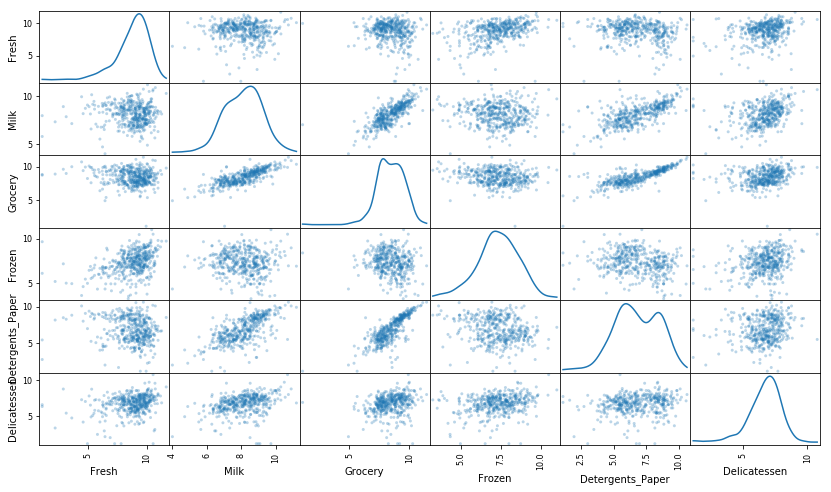

In [9]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [10]:
# Display the sample data
display(samples)
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,4591,15729,16709,33,6956,433
1,9193,4885,2157,327,780,548
2,27167,2801,2128,13223,92,1902


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
1,9.126198,8.493925,7.676474,5.789960,6.659294,6.306275
2,10.209758,7.937732,7.662938,9.489713,4.521789,7.550661


### Observation - Answer

For all the pairs of features that I have identified as being correletd, the correlation is still present.<br>

It is difficult to say whether the correlation is now stronger, or weaker than before applying the natural logarithm scaling. What can be observed is that the data points are no longer clustered so densley around the 0 value.

### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [11]:
# Define an array for storing the list of all outliers for all features

outliers = []

# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature],25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature],75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = (Q3-Q1)*1.5
    
    # Display the outliers
    print("Data points considered outliers for the feature '{}':".format(feature))
    out=log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))]
    display(out)
    outliers=outliers+list(out.index.values)
    
# OPTIONAL: Select the indices for data points you wish to remove
outliers = list(set([x for x in outliers if outliers.count(x) > 1]))

print("The following outliers were identified: {}".format(outliers))

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

print("The corrected dataset now contains {} data points after removing the outliers.".format(len(good_data)))

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


The following outliers were identified: [128, 65, 66, 75, 154]
The corrected dataset now contains 435 data points after removing the outliers.


### Question 4
* Are there any data points considered outliers for more than one feature based on the definition above? 
* Should these data points be removed from the dataset? 
* If any data points were added to the `outliers` list to be removed, explain why.

** Hint: ** If you have datapoints that are outliers in multiple categories think about why that may be and if they warrant removal. Also note how k-means is affected by outliers and whether or not this plays a factor in your analysis of whether or not to remove them.

### Question 4 - Answer

As can be seen from the results above, there are five outliers that are present in more than one feature.<br>

These outliers should defintely be removed from the data set for the reason being as follows. With clustering algorithms as k-means, the algorithm computes (generally speaking) the average distance from the data points to the cluster center. With outliers being part of the average computation, the cluster center will move more towards the outlier. This is not a desirable effect.

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

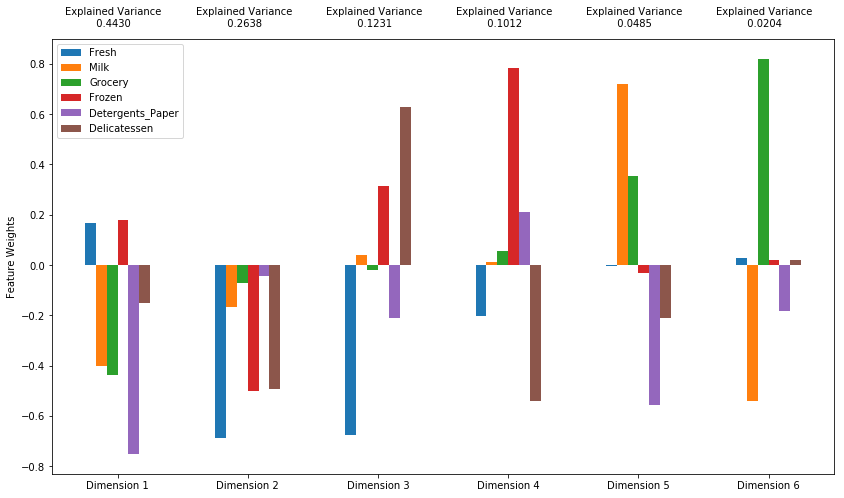

In [12]:
from sklearn.decomposition import PCA

# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA().fit(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)

### Question 5

* How much variance in the data is explained* **in total** *by the first and second principal component? 
* How much variance in the data is explained by the first four principal components? 
* Using the visualization provided above, talk about each dimension and the cumulative variance explained by each, stressing upon which features are well represented by each dimension(both in terms of positive and negative variance explained). Discuss what the first four dimensions best represent in terms of customer spending.

**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the individual feature weights.

### Question 5 - Answer

The first and second principal component explain approximate 70.68% of the variance in the data.<br>

The first four principal components explain approxiamte 93.11% of the variance in the data.<br>

**Dimension 1**: This dimension has a positive weight (approx 0.2 each) for the features `Fresh` and `Frozen`. All other features show a negative weight. We can expect a customer with a high value in dimension 1 to spend money on fresh and frozen products. For all the other product categories we can expect increasing lower spendings with an increase in this dimension; whereby the lowest amount will be spent on detergents_papers. This customer could represent a restaurant.<br>

**Dimension 2**: This dimension has a negative weight for all features. We can expect a customer with a high value in dimension 2 to spend little on all product groups; whereby the least is spent on fresh, frozen and delicatessen products and some money is spent on milk, grocery and detergent_paper products. This customer could represent a coffee shop.

**Dimension 3**: This dimension has a high positive weight on feature `Delicatessen` and a positive weigth around 0.3 for feature `Frozen`. We can expect a customer with a high value in dimension 3 to spend considerable amounts of money on delicatessen products and (to a lower degree) on frozen products. A small amount would also be spent on milk products. This customer could represent a delicatessen shop.

**Dimension 4**: This dimension has a very high weight on feature `Frozen`, followed by feature `Detergent_Paper` with about 0.2 and some even smaller weigths for the features `Grocery` and `Milk`. The feature `Delicatessen` shows the lowest weight in this dimension. We can expect a customer with a high value in dimension 4 to spend considerable amounts on frozen products. This customer could represent an ice cream shop, or a retailer specialised in frozen products.

**Dimension 5**: This dimension has a very high weight on feature `Milk`, followed by feature `Grocery` with about 0.35. The feature `Detergent_Paper` shows the lowest weight in this dimension; followed by the feature `Delicatessen` with a weight of approximate -0.2. We can expect a customer with a high value in dimension 5 to spend considerable amounts on grocery products.

**Dimension 6**: This dimension has a very high weight on feature `Grocery` and a low weight for feature `Milk` and feature `Detergents_Paper`. All other features are presented by small weight values close to 0. This dimension is interesting in terms of which customer it could present. One might be tempted to guess it being a grocery store, but the low weight for the feature `Milk` rises doubts. In case of this doubt, one might also consider to drop this dimension, due to its low variance score.

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [13]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,-3.3537,2.0210,-1.7678,-2.0808,0.6677,-0.2667
1,0.1465,0.7135,-0.9114,-1.1366,0.1934,-0.8438
2,2.6362,-2.3118,0.7328,0.4172,0.5960,-0.0324


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [14]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2).fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [15]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,-3.3537,2.0210
1,0.1465,0.7135
2,2.6362,-2.3118


## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

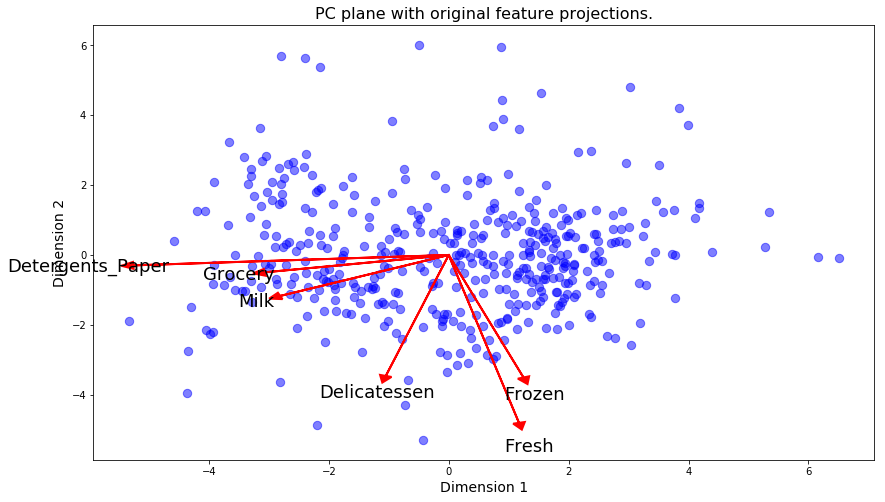

In [16]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?

### Observation - Answer

We can see from the biplot that the features `Detergent_Paper`, `Grocery` and `Milk` are strongly correlated on the negative side of dimension 1. Furthermore, the features `Delicatessen`, `Frozen` and `Fresh` are strongly correlated on the negative side of dimension 2. These findings are in line with the observations from the pca_results obtained earlier.

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6

* What are the advantages to using a K-Means clustering algorithm? 
* What are the advantages to using a Gaussian Mixture Model clustering algorithm? 
* Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?

** Hint: ** Think about the differences between hard clustering and soft clustering and which would be appropriate for our dataset.

### Question 6 - Answer

**Advantages to using a K-Means clustering algorithm**

The advantages of the K-means clustering algorithm are that it

- is simple to implement and understand,
- works fast with low dimensional data and large data sets,
- works well for problems, where one data point might only belong to one cluster  

**Advantages to using a Gaussian Mixture Model clustering algorithm**

The advantages of the Gaussian Mixture Model clustering algorithm are that it

- is a fast algorithm for learning mixture models. [Reference](https://scikit-learn.org/stable/modules/mixture.html)
- allows for a membership (to a specific degree/probability) of a data point to more than one cluster. In K-means a data point will only beling to one cluster.  

**Clustering algorithm recommendation**

Given our knowledge about the wholesale customer data so far, I will use the Gaussian Mixture Model (GMM) for the following reason. GMM allows for soft clustering of data points, meaning that a specifc customer spending (data point) might belong to more than one cluster. By applyinbg GMM, I hope to detect patterns that I might miss by only assigning one data point to one cluster with K-means.

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
 - Assign the silhouette score to `score` and print the result.

The silhouette score for 10 clusters is 0.3199016382965419
The silhouette score for 8 clusters is 0.32686582140624976
The silhouette score for 6 clusters is 0.322271185313988
The silhouette score for 5 clusters is 0.28088927277693937
The silhouette score for 4 clusters is 0.3458671375116742
The silhouette score for 3 clusters is 0.4042487382407879
The silhouette score for 2 clusters is 0.42191684646261485


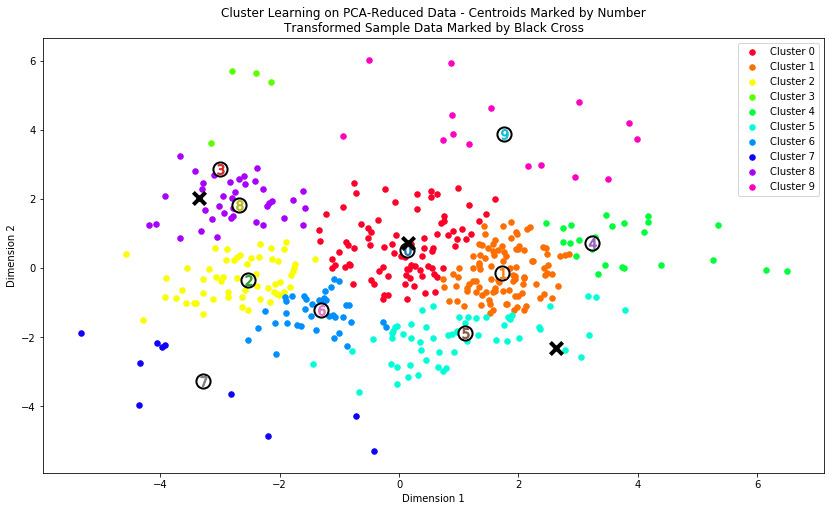

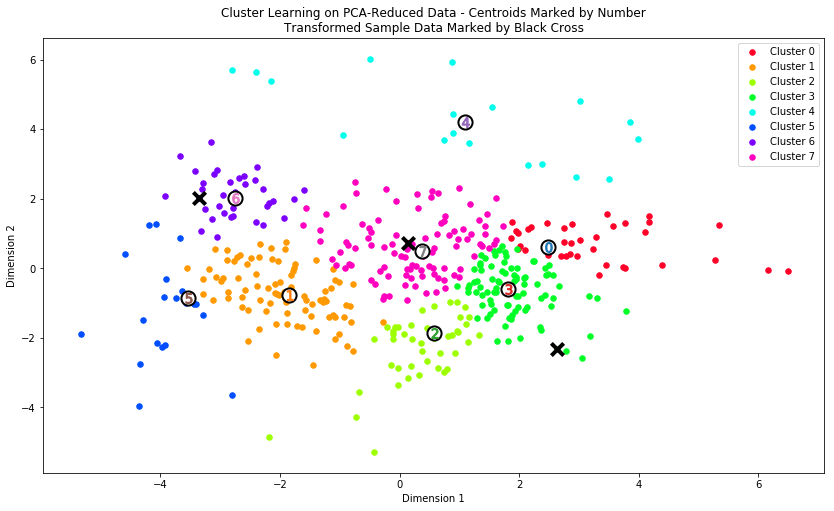

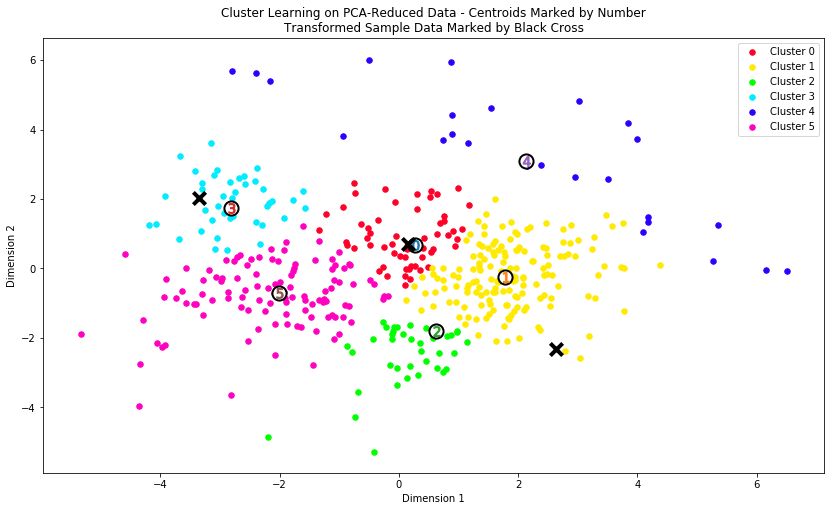

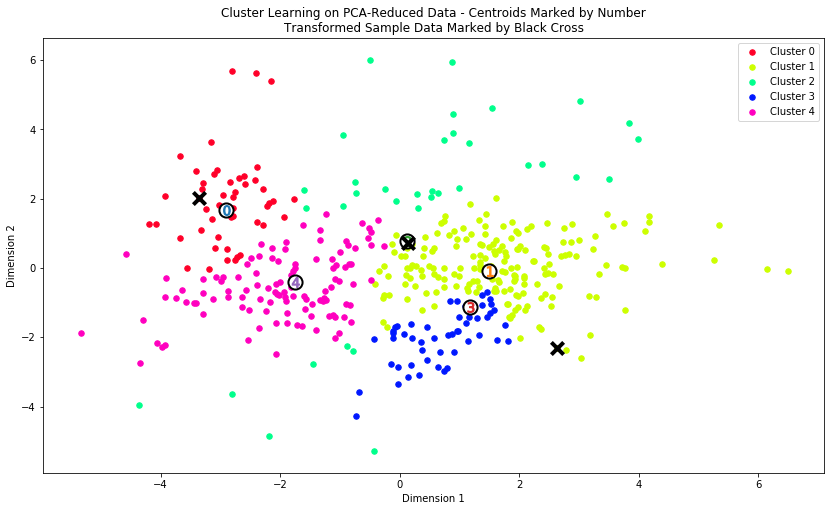

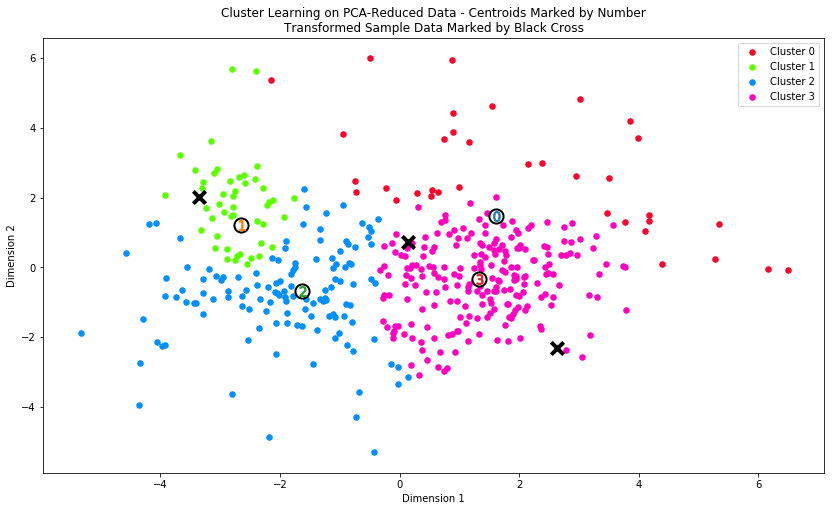

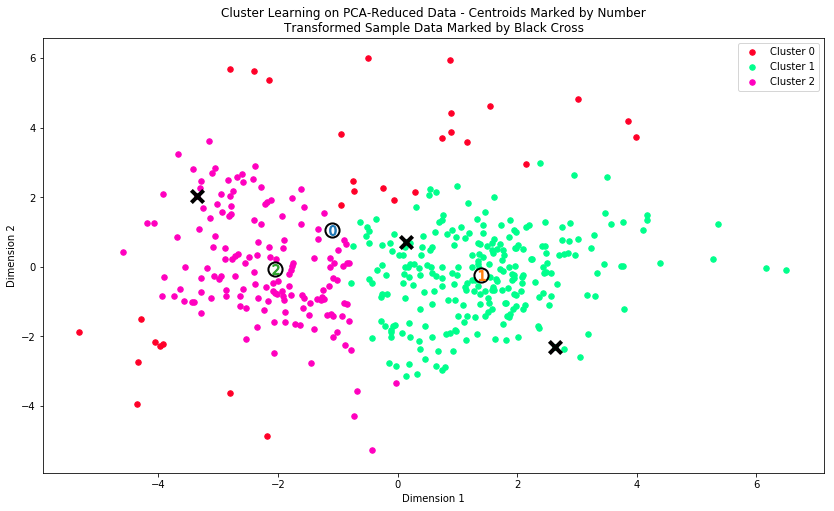

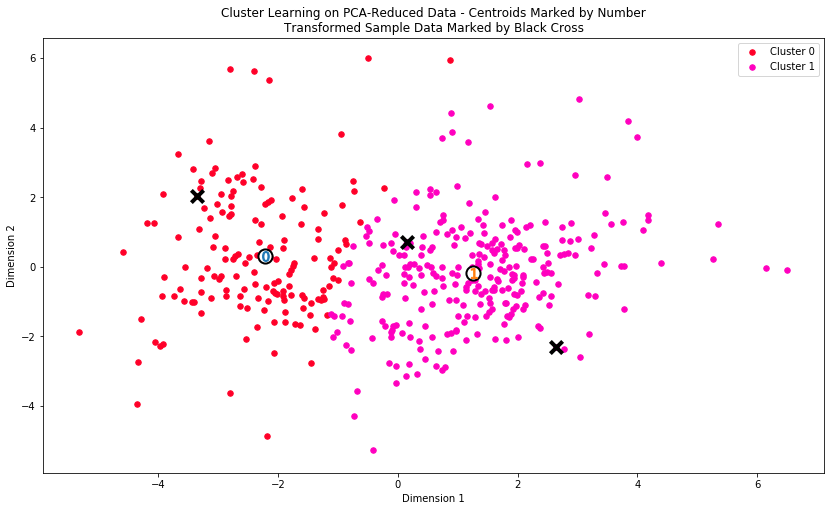

In [17]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

number_clusters = [10,8,6,5,4,3,2]

for n in number_clusters:

    # TODO: Apply your clustering algorithm of choice to the reduced data 
    clusterer = GaussianMixture(n_components=n).fit(reduced_data)

    # TODO: Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)

    # TODO: Find the cluster centers
    centers = clusterer.means_

    # TODO: Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(pca_samples)

    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data,preds)
    
    # Display the results of the clustering from implementation
    vs.cluster_results(reduced_data, preds, centers, pca_samples)

    print("The silhouette score for {} clusters is {}".format(n,score))

### Question 7

* Report the silhouette score for several cluster numbers you tried. 
* Of these, which number of clusters has the best silhouette score?

### Question 7 - Answer

As can be seen from the printout above, the silhouette score for 2 clusters has the best value out of all tested cluster combinations.<br>

In addition I have included the plots from the visual representation of each clustering iteration.

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

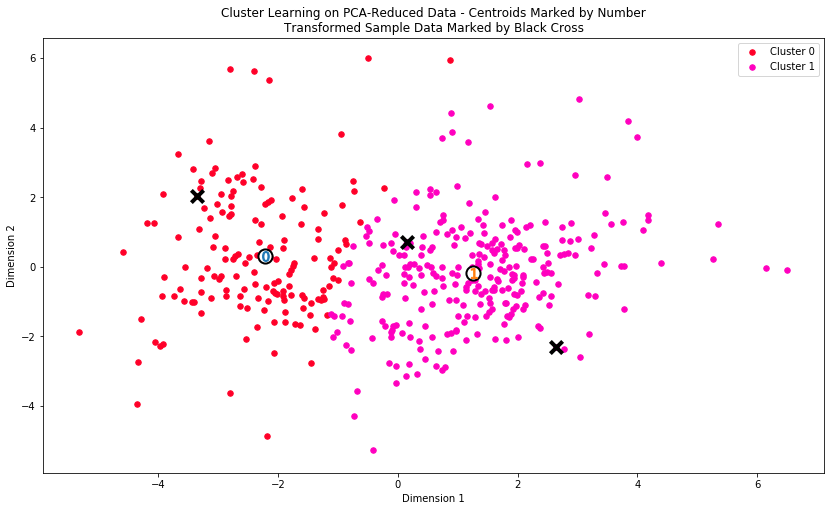

In [18]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [19]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,3552.0,7837.0,12219.0,870.0,4696.0,962.0
Segment 1,8953.0,2114.0,2765.0,2075.0,353.0,732.0


### Question 8

* Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project(specifically looking at the mean values for the various feature points). What set of establishments could each of the customer segments represent?

**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`. Think about what each segment represents in terms their values for the feature points chosen. Reference these values with the mean values to get some perspective into what kind of establishment they represent.

### Question 8 - Answer

**Segment 0**

A customer who is assigned to Segment 0, spends considerably less than the mean (as dispayed below) for the feature points `Fresh` and `Frozen`. Also the spending on the feature points `Delicatessen`, `Grocery` are below the mean for these feature points. Only the feature points `Milk`, `Grocery` and `Detergents_Paper` are above the mean, the feature point `Grocery` is considerably above the mean. This reference value could respresent a grocery shop or supermarket.

**Segment 1**

A customer who is assigned to Segment 1, spends less than the mean for all feature points. It is interesting to see that that highest spendings are on the feature points `Fresh` and `Grocery`. The feature points `Milk` and `Frozen` are both around 2100 spending units. This reference value could respresent a restaurant.   

### Question 9

* For each sample point, which customer segment from* **Question 8** *best represents it? 
* Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [20]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print("Sample point", i, "predicted to be in Cluster", pred)

Sample point 0 predicted to be in Cluster 0
Sample point 1 predicted to be in Cluster 1
Sample point 2 predicted to be in Cluster 1


### Question 9 - Answer

For answering the question 9, I will print out the sample points once more.

In [21]:
display(samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,4591,15729,16709,33,6956,433
1,9193,4885,2157,327,780,548
2,27167,2801,2128,13223,92,1902


A mapping of the intial predicition to assignment to either Cluster 0 or Cluster 1 is as follows.<br>

Sample 1 -> intial predicition: **"supermarket/large grocery store"** -> Cluster Assignment 0: **"supermarket/grocery store"**<br>
Sample 2 -> intial predicition: **"small grocery store"**             -> Cluster Assignment 1: **"restaurant"**<br>
Sample 3 -> intial predicition: **"restaurant"**                      -> Cluster Assignment 1: **"restaurant"**<br>

As we can see from the above mapping, the inital guesses for sample 3 are in line with the cluster assigment of this data point/customer. For sample 1, I have been quiet close with my initial guess by prediciting a "large" grocery store. My prediciton for sample 2 was wrong, but it is interesting for this sample to have a closer look at the plot of the cluster visualisation. There we can see that the sample point lies close to the border of the cluster 0 and cluster 1.<br>

As I have been using the Gaussian Mixture Model clustering algorithm, sample 2 could represent a data point having probabilites of belonging to (more or less equal parts) both clusters. That could explain my wrong guess.

## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. 

* How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*

**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

### Question 10 - Answer

The wholesale distribuor should first have a closer look at the type of establishment each customer segments represents. From this the wholesale distributor could gain a first guess on how customers would react. For example, we have assumed above that segment 0 can be labled as grocery stores. These establishments have a low spending on the feature `Fresh`, so the need for storing fresh products would not be so high. The wholesale distributor can assume that 2 deliveries less per week, would not impact the statisfaction level of these customers.<br>

For customers in segment 1, fewer deliveries might be a problem because spendings for feature `Fresh` are above the mean in this cluster. Restaurants will depend on fresh products like salad, fish, etc.<br>

The wholesale distributor should consider to randomly define two test groups in each segment. Each group is then further split into a group A (no change in delivery frequency) and group B (change in delivery frequency). Customers in group B should then be monitored in terms of changes in their pendings and satisfaction surveys.

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
* How can the wholesale distributor label the new customers using only their estimated product spending and the **customer segment** data?

**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

### Question 11 - Answer

The wholesale distributor would first need to build and train a supervised learning algorithm with following setup.<br>

`X_train` will represent all the customer spending data points excluding the customer segments.<br>
`Y_train` will present the customer segments 0 and 1.<br>

Once the model has been fit on the `X_train` and `Y_train` data, we will predict the allocation of customers to a segment.<br>

`X_test` will represent the ten new customers we want to predict.

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

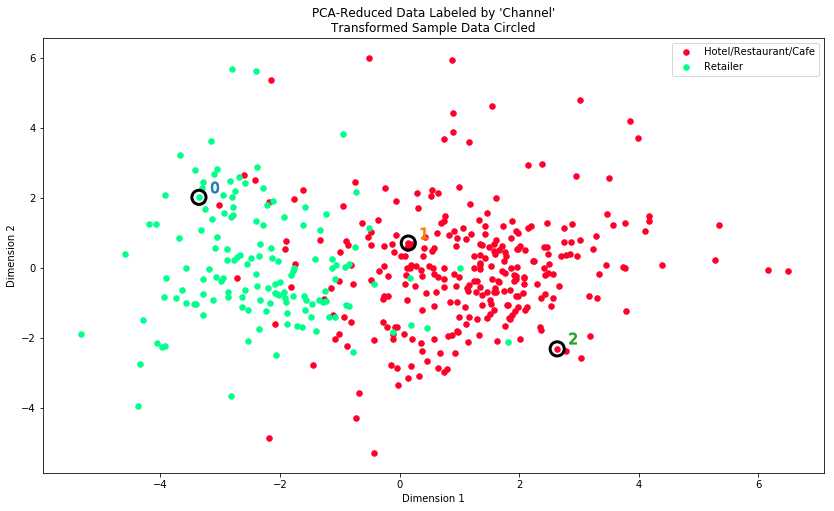

In [22]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers, pca_samples)

### Question 12

* How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? 
* Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? 
* Would you consider these classifications as consistent with your previous definition of the customer segments?

### Question 12 - Answer

**How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers?**

The clusters that we created with the GMM algorithm share a strong similarity with the underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers. We can see in the above visualisation, that sample 1 lies again close to border between the two clusters.<br>

**Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution?**

Some data points labeled `'HoReCa'` appear in the cluster 0 area and some data points labeled `'Retail'` appear in the cluster 1 area. This pattern seems to occur often at the border of the two clusters, which could be due to the soft clustering of the GMM algorithm. One could argue that around the cluster centers/means, the customer segments can be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes'.

**Would you consider these classifications as consistent with your previous definition of the customer segments**

Overall, I would consider these classifications consistent with my previous definitons of the customer segments, although some classifications in the center could have been misclassified.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.